# Import Library
- **pandas** is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way towards this goal.

- **Numpy** 
  It provides:

  -   a powerful N-dimensional array object
  -   sophisticated (broadcasting) functions
  -   tools for integrating C/C++ and Fortran code
  -   useful linear algebra, Fourier transform, and random number capabilities
  -   and much more]

- **TDQM**
tqdm derives from the Arabic word taqaddum (تقدّم) which can mean “progress,” and is an abbreviation for “I love you so much” in Spanish (te quiero demasiado).
- Install Libaries
  - load datasets
  - rich ( pretty print )
  - transforme
  - [wandb](https://wandb.ai/site)

In [34]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
'''
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
'''
import sys
import importlib
## Check if running on Google Colab and python libraries are installed alreay
if 'google.colab' in sys.modules and importlib.util.find_spec("optimum") is None:
    print("Running on Google Colab")
    !pip install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cu116
    !pip install nltk
    !pip install transformers
    !pip install scikit-multilearn
    !pip install pandas
    !pip install datasets
    !pip install rich 
    !pip install rich==12.4.4 #Rich is a Python library for rich text and beautiful formatting in the terminal.
    !pip install huggingface_hub
    !pip install nlpaug==1.1.10 # NLP Augmentation Libraries 
    !pip install nltk
    !pip install huggingface_hub
    !pip install torchscan
    !pip install transformers accelerate optimum
    # Hyperaparameter Tuning
    !pip install "ray[tune]"



else:
    print("Not running on Google Colab")
## Imports and Setup
import importlib
## Check if nltk is installed
if importlib.util.find_spec("nltk"):
    print("nltk is  installed")
    import nltk
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
import nlpaug.augmenter.word as naw
import nltk
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc
from nlpaug.util import Action
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns
from rich import print
## Constant
SEED  =    42


Not running on Google Colab

nltk is  installed

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/null/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/null/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/null/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Reduce Randomness while traing the Models

In [3]:
from transformers import set_seed , enable_full_determinism

set_seed( SEED ) 
enable_full_determinism( SEED )

# Hugging Face Hub

In [4]:
from huggingface_hub import notebook_login

notebook_login()

# Import your Libraries
- Chossing AutoModel and AutoTokenizer as it to do. While , calleding DistillBertTokenizer require to look for the spefici on the website. 

In [5]:
import torch
from transformers import (AutoTokenizer, AutoConfig,
                          AutoModelForSequenceClassification)
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import numpy as np
import pandas as pd
import os
import json
from rich import print

from pathlib import Path
import tqdm


# Load the Dataset

In [6]:
from datasets import load_dataset
dataset = load_dataset(
    "Rami/multi-label-class-github-issues-text-classification"
)
print( dataset )

Using custom data configuration Rami--multi-label-class-github-issues-text-classification-536eed6299144ba0
Found cached dataset parquet (/home/null/.cache/huggingface/datasets/Rami___parquet/Rami--multi-label-class-github-issues-text-classification-536eed6299144ba0/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    valid: Dataset({
        features: ['title', 'labels', 'bodyText'],
        num_rows: 778
    })
    test: Dataset({
        features: ['title', 'labels', 'bodyText'],
        num_rows: 778
    })
    train: Dataset({
        features: ['title', 'labels', 'bodyText'],
        num_rows: 1556
    })
})

In [7]:
print( dataset['train'][0]["bodyText"] )

🐛 Bug
If I try to use torch-xla nightly with PyTorch Lightning, I see this crash:
(torch-xla-nightly) zcain@zcain-pl-verify:~/pytorch-lightning/pl_examples/domain_templates$ python 
computer_vision_fine_tuning.py 
Traceback (most recent call last):
  File "computer_vision_fine_tuning.py", line 55, in <module>
    import pytorch_lightning as pl
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/pytorch_lightning/__init__.py", line 65, in 
<module>
    from pytorch_lightning.trainer import Trainer
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/pytorch_lightning/trainer/__init__.py", line 
18, in <module>
    from pytorch_lightning.trainer.trainer import Trainer
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/pytorch_lightning/trainer/trainer.py", line 
30, in <module>
    from pytorch_lightning.loggers import LightningLoggerBase
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/pytorch_lightning/loggers/__init__.py", line 
18, in <module>
    from pytorch_lightning.loggers.tensorboard import TensorBoardLogger
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/pytorch_lightning/loggers/tensorboard.py", 
line 24, in <module>
    from torch.utils.tensorboard import SummaryWriter
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/torch/utils/tensorboard/__init__.py", line 8,
in <module>
    from .writer import FileWriter, SummaryWriter  # noqa F401
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/torch/utils/tensorboard/writer.py", line 9, 
in <module>
    from tensorboard.compat.proto.event_pb2 import SessionLog
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/tensorboard/compat/proto/event_pb2.py", line 
17, in <module>
    from tensorboard.compat.proto import summary_pb2 as tensorboard_dot_compat_dot_proto_dot_summary__pb2
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/tensorboard/compat/proto/summary_pb2.py", 
line 17, in <module>
    from tensorboard.compat.proto import tensor_pb2 as tensorboard_dot_compat_dot_proto_dot_tensor__pb2
  File "/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/tensorboard/compat/proto/tensor_pb2.py", line
16, in <module>
    from tensorboard.compat.proto import resource_handle_pb2 as 
tensorboard_dot_compat_dot_proto_dot_resource__handle__pb2
  File 
"/anaconda3/envs/torch-xla-nightly/lib/python3.6/site-packages/tensorboard/compat/proto/resource_handle_pb2.py", 
line 150, in <module>
    '__module__' : 'tensorboard.compat.proto.resource_handle_pb2'
SystemError: google/protobuf/pyext/descriptor.cc:354: bad argument to internal function

Repro
create VM:
gcloud compute instances create zcain-vm
--zone=us-central1-a
--machine-type=e2-highmem-16
--image-family=torch-xla
--image-project=ml-images
--boot-disk-size=300GB
--scopes=https://www.googleapis.com/auth/cloud-platform
create TPU:
gcloud compute tpus create zcain-tpu
--zone=us-central1-a
--network=default
--version=pytorch-nightly
--accelerator-type=v3-8
SSH into VM:
(VM) git clone https://github.com/PyTorchLightning/pytorch-lightning.git
(VM) conda activate torch-xla-nightly
(VM) export TPU_IP_ADDRESS=<TPU's IP address>
(VM) export XRT_TPU_CONFIG="tpu_worker;0;$TPU_IP_ADDRESS:8470"
(VM) cd pytorch-lightning
(VM) pip install .
(VM) pip install -r requirements/test.txt
(VM) cd pl_examples/domain_templates/
(VM) vim computer_vision_fine_tuning.py
(VM) <replace GPUs arg with tpu_cores=8,>
(VM) python computer_vision_fine_tuning.py

Note: I get the same crash when using pip install pytorch-lightning instead of installing from source
If I use torch-xla-1.7, training works fine.
Environment
* CUDA:
        - GPU:
        - available:         False
        - version:           None
* Packages:
        - numpy:             1.19.2
        - pyTorch_debug:     False
        - pyTorch_version:   1.9.0a0+8c185e6
        - pytorch-lightning: 1.1.8
        - tqdm:    

# Get the Number of Labels in the Dataset

In [8]:
import copy
labels = dict()
for split in dataset.keys():
  for  list_of_element   in dataset[split]["labels"]:
    for label in list_of_element:
      if label not in labels:
        labels[label] = 1
      else:
        labels[label] += 1
CLASS_FREQ = copy.deepcopy(labels)
print(f"The number of difference labels are {len(labels)}")
## Sort the labels frequency
sort_labels_freqs = sorted(labels.items(), key=lambda x: x[1], reverse=True)
for key , value in sort_labels_freqs:
  print(f"-{key} : {value}")

The number of difference labels are 45

-help wanted : 1959

-bug : 1328

-feature : 845

-question : 647

-won't fix : 550

-priority: 0 : 238

-good first issue : 205

-docs : 187

-priority: 1 : 157

-logger : 101

-waiting on author : 92

-distributed : 91

-discussion : 87

-design : 81

-checkpointing : 73

-3rd party : 62

-duplicate : 59

-ci : 58

-priority: 2 : 50

-accelerator: tpu : 50

-working as intended : 49

-refactor : 47

-let's do it! : 45

-logging : 26

-trainer: tune : 19

-strategy: dp : 19

-data handling : 18

-environment: slurm : 18

-example : 17

-callback : 16

-callback: model checkpoint : 3

-trainer: validate : 2

-strategy: ddp : 1

-code quality : 1

-optimizer : 1

-fault tolerance : 1

-lr scheduler : 1

-logger: wandb : 1

-environment : 1

-loops : 1

-ready : 1

-logger: mlflow : 1

-trainer: test : 1

-hooks : 1

-breaking change : 1

# EDA

## Display the Distribution of the class labels

The number of labels are 7212

<AxesSubplot:ylabel='Count'>

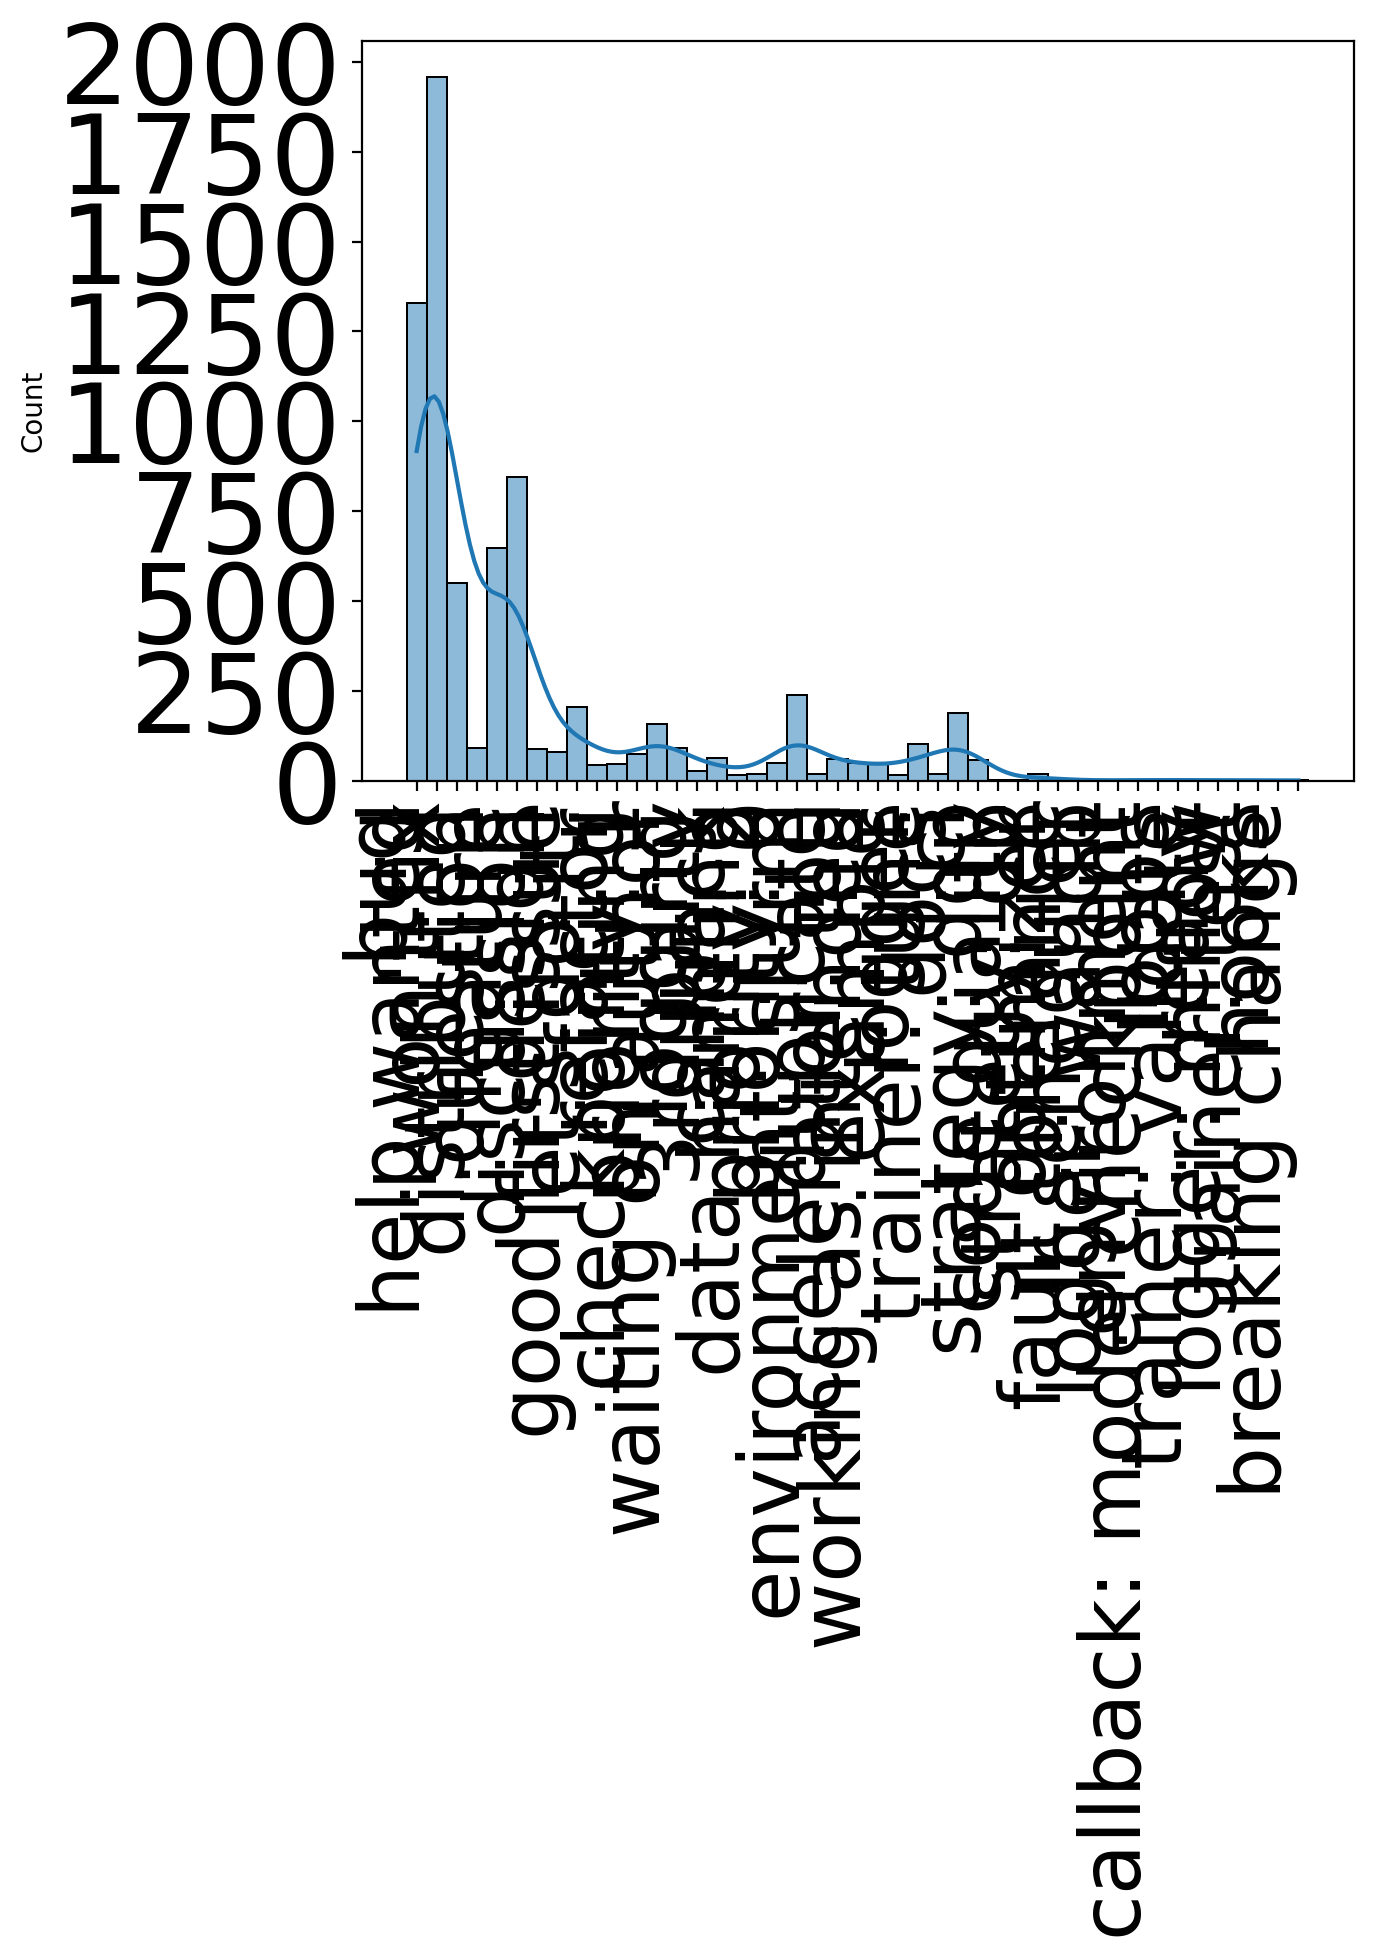

In [9]:
import seaborn as sns
## Display the the distribution of the labels with a histogram
labels: list = []

labels = [label for split in dataset.keys() for list_of_element in dataset[split]["labels"] for label in list_of_element]
print(f"The number of labels are {len(labels)}")
## make sure the labels are sorted and how do I make sure the 45 name of each labels are displayed and easy to read using xticks
from matplotlib import pyplot as plt


# Use a larger font size for the labels
plt.xticks(fontsize=30)

# Use a rotational transformation on the labels
plt.xticks(rotation=90)

plt.yticks(fontsize=40)

# Use a horizontal alignment for the labels with the xtick has a 90 rotation
plt.xticks(ha='right')
## Change the size of hte image
plt.rcParams['figure.figsize'] = [20 , 20]
#sns.set(style='whitegrid', palette='muted', font_scale=1.0 , rc = {'figure.figsize':( 30 , 30 )})



sns.histplot(labels, discrete=True , kde = True)


## Display the Distribution of the length of the text
1.This take a long time to train the model 

The number of valid is 778

The number of test is 778

The number of train is 1556

The number of error in the programs was 0

The longest text is 62338

The shortest text in the sequence is 0

[6333, 1656, 1179, 3501, 1911, 1127, 735, 343, 951, 44]

<AxesSubplot:title={'center':'The distribution of the text length'}, ylabel='Count'>

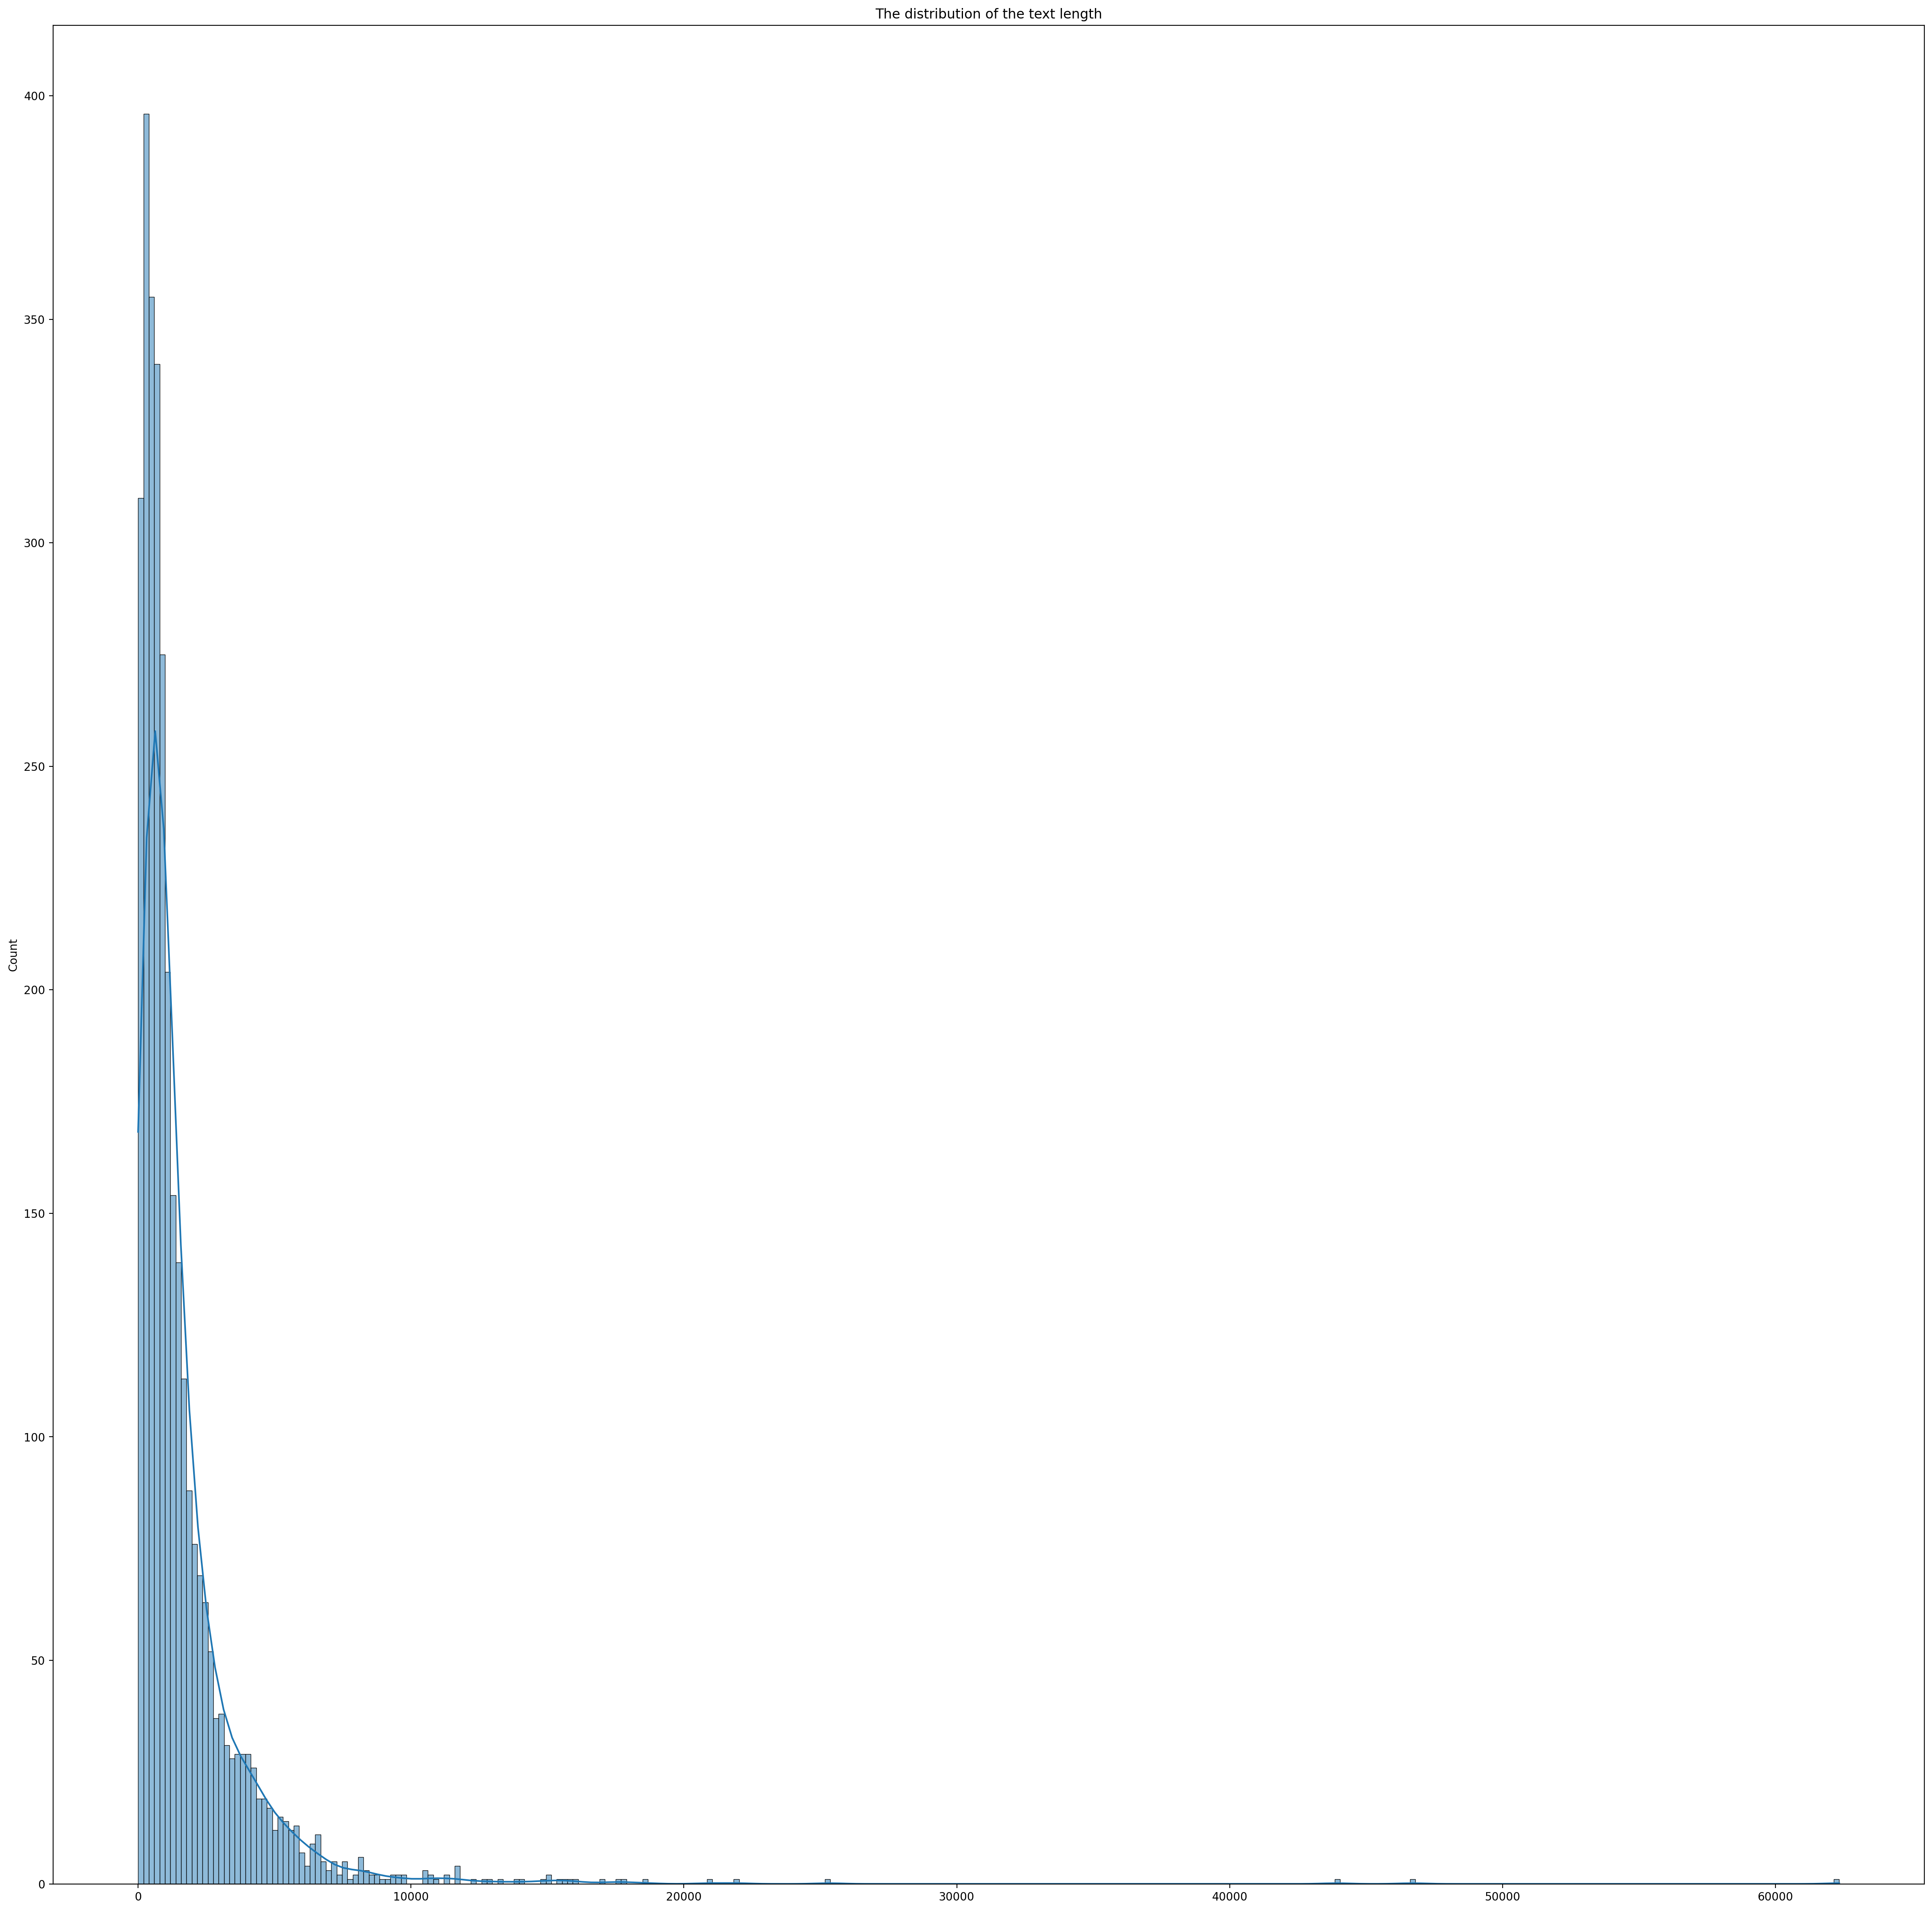

In [10]:
text_length = [0] * ( len(dataset["train"]["bodyText"]) + len(dataset["test"]["bodyText"]) + len(dataset["valid"]["bodyText"]) )
number_of_errors = 0
index = 0
for split in dataset.keys():
  print(f"The number of {split} is {len(dataset[split]['bodyText'])}")
  for sample in dataset[split]:
    try:
      text_length[index] = len(sample["bodyText"])
      index += 1
    except:
      number_of_errors+=1
print("The number of error in the programs was {}".format(number_of_errors))
print(f"The longest text is {max(text_length)}")
print(f"The shortest text in the sequence is {min(text_length)}")
print(text_length[:10])
## remove the old seaborn. now Create a new one
## add text in the image
plt.title("The distribution of the text length")
sns.histplot(text_length  ,  kde = True  )


## Frequency of each word

In [11]:
## Frequency of each words
words = dict()
for split in dataset.keys():
  for sample in dataset[split]["bodyText"]:
    for word in sample.split():
      if word not in words:
        words[word] = 1
      else:
        words[word] += 1
print(f"The number of difference words are {len(words)}")
## Sort the dictionary in the descending order
words = sorted(words.items(), key=lambda x: x[1], reverse=True )
print(words[:80])

The number of difference words are 63349

[
    ('the', 15396),
    ('=', 12301),
    ('in', 10061),
    ('to', 9417),
    ('is', 5746),
    ('and', 5438),
    ('a', 5430),
    ('I', 5427),
    ('-', 4415),
    ('of', 4345),
    ('line', 4048),
    ('File', 3797),
    ('for', 3747),
    ('def', 3686),
    ('#', 3165),
    ('return', 3019),
    ('be', 2746),
    ('with', 2719),
    ('from', 2648),
    ('not', 2646),
    ('it', 2541),
    ('this', 2450),
    ('if', 2443),
    ('that', 2296),
    ('|', 2202),
    ('as', 2145),
    ('import', 2047),
    ('on', 1941),
    ('model', 1893),
    ('version:', 1581),
    ('have', 1475),
    ('but', 1386),
    ('training', 1374),
    ('using', 1342),
    ('The', 1310),
    ('can', 1237),
    ('you', 1215),
    ('are', 1189),
    ('when', 1186),
    ('or', 1152),
    ('loss', 1135),
    ('should', 1103),
    ('my', 1079),
    ('Bug', 1070),
    ('🐛', 1060),
    ('an', 1044),
    ('use', 1034),
    ('trainer', 985),
    ('behavior', 932),
    ('batch', 928),
    ('code', 920),
    ('we', 917),
    ('would', 910),
    ('at', 904),
    ('To', 892),
    ('class', 892),
    ('which', 874),
    ('This', 863),
    ('by', 856),
    ('like', 856),
    ('will', 851),
    ('Expected', 816),
    ('PyTorch', 814),
    ('GPU', 790),
    ('batch,', 784),
    ('0', 783),
    ('Environment', 767),
    ('x', 766),
    ('Reproduce', 763),
    ('only', 763),
    ('call', 761),
    ('1', 730),
    ('available:', 705),
    ('your', 696),
    ('True', 688),
    ('OS:', 684),
    ('context', 683),
    ('has', 679),
    (')', 672),
    ('Additional', 670)
]

#### Display the most frequent words for each class

In [12]:
freq_for_class = dict()
for split in dataset.keys():
    for title , labels  , bodyText in zip(dataset[split]["title"] , dataset[split]["labels"] , dataset[split]["bodyText"]):
        for label in labels:
            if label not in freq_for_class:
                freq_for_class[label] = dict()
            for word in bodyText.split():
                if word not in freq_for_class[label]:
                    freq_for_class[label][word] = 1
                else:
                    freq_for_class[label][word] += 1


# Clean the Datset

## Remove URLs in the dataset 
1. This is a good practice to remove the URLs from the dataset as it does not add any value to the model [link](https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python)

In [13]:
#remove urls in teh dataset
import re
def remove_urls( batch ):
    """Remove URLs from text.
    
    Args:
        batch: A list of strings.
        
    Returns:
        list: A list of strings with URLs removed.
    """
    batch["bodyText"] = [re.sub(r'https?://\S+', "", text) for text in batch["bodyText"]]
    return batch
dataset = dataset.map(remove_urls , batched = True )

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

## remove emojis

In [14]:
#remove urls in teh dataset
import re
def remove_emojis(batch):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    # return re.sub(emoj, '', data)
    batch["bodyText"] = [re.sub( emoj  , r'', text) for text in batch["bodyText"]]
    return batch
dataset = dataset.map(remove_emojis , batched = True )

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

# Binarze the Dataset to for Cross Entropy Loss
1. https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
2. [Why we use Cross Entropy Loss](https://www.youtube.com/watch?v=9dLd6n9yT8U&t=635s)


In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
all_labels = [label for split in dataset.keys() for list_of_element in dataset[split]["labels"] for label in list_of_element]
all_labels = list(set(all_labels))
mlb = MultiLabelBinarizer()
mlb.fit([all_labels])

MultiLabelBinarizer()

## Example of Scikit Learn MultiLabel Binarizer

In [16]:
print(mlb.classes_)
print(mlb.transform([["design", "logging"], ["environment","refactor"]]))
print("Second example the dataset is ")
print(mlb.transform([['bug', 'help wanted', "won't fix", 'accelerator: tpu' , "loops"]]))
print("Third example the dataset is ")
print(mlb.transform([["3rd party" , "accelerator: tpu"]]))
print(type(mlb.transform([["3rd party" , "accelerator: tpu"]])))

['3rd party' 'accelerator: tpu' 'breaking change' 'bug' 'callback'
 'callback: model checkpoint' 'checkpointing' 'ci' 'code quality'
 'data handling' 'design' 'discussion' 'distributed' 'docs' 'duplicate'
 'environment' 'environment: slurm' 'example' 'fault tolerance' 'feature'
 'good first issue' 'help wanted' 'hooks' "let's do it!" 'logger'
 'logger: mlflow' 'logger: wandb' 'logging' 'loops' 'lr scheduler'
 'optimizer' 'priority: 0' 'priority: 1' 'priority: 2' 'question' 'ready'
 'refactor' 'strategy: ddp' 'strategy: dp' 'trainer: test' 'trainer: tune'
 'trainer: validate' 'waiting on author' "won't fix" 'working as intended']

[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0]]

Second example the dataset is

[[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0]]

Third example the dataset is

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]]

<class 'numpy.ndarray'>

## Create a new column in the dataset in the train , val and test split set MultiLabel Binarizer using the Map Function

In [17]:
def mulit_label_binarizer( batch ):
  batch["label_ids"] = mlb.transform(batch["labels"])
  return batch
## batch the target labels
dataset = dataset.map(mulit_label_binarizer , batched = True ).shuffle( SEED )
## rename same column in the program 
dataset = dataset.rename_column("labels", "list_of_labels_in_text")


  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

## [Split the dataset](https://madewithml.com/courses/mlops/splitting/)
- To create the splits we can use the iterative_train_test_split() function from Scikit-multilearn, which creates the train/test splits iteratively to achieve balanced labels. We wrap it in a function that we can apply to DataFrames. Since the function expects a two-dimensional feature matrix, we need to add a dimension to the possible indices before making the split:
- if we had a multi-label classification task, then we would've applied iterative stratification via the skmultilearn library, which essentially splits each input into subsets (where each label is considered individually) and then it distributes the samples starting with fewest "positive" samples and working up to the inputs that have the most labels. Iterative stratification essentially creates splits while "trying to maintain balanced representation with respect to order-th label combinations". We used to an order=1 for our iterative split which means we cared about providing representative distribution of each tag across the splits. But we can account for higher-order label relationships as well where we may care about the distribution of label combinations

In [18]:
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.feature_extraction.text import CountVectorizer

def balanced_split(df, test_size=0.5):
    ind = np.expand_dims(np.arange(len(df)), axis=1)
    labels = df["labels"]
    ind_train, _, ind_test, _ = iterative_train_test_split(ind, labels,
                                                            test_size)
    return df.iloc[ind_train[:, 0]], df.iloc[ind_test[:,0]]
'''
df_train, df_tmp = balanced_split(dataset["train"], test_size=0.5)
df_valid, df_test = balanced_split(df_tmp, test_size=0.5)
assert dataset["multi_label_binarizer"].to_numpy()[0].nonzero()
assert df_train["multi_label_binarizer"].to_numpy()[0].nonzero()
print(type(df_train))
'''

'\ndf_train, df_tmp = balanced_split(dataset["train"], test_size=0.5)\ndf_valid, df_test = balanced_split(df_tmp, test_size=0.5)\nassert dataset["multi_label_binarizer"].to_numpy()[0].nonzero()\nassert df_train["multi_label_binarizer"].to_numpy()[0].nonzero()\nprint(type(df_train))\n'

In [19]:
print( dataset["train"].shape )
print( dataset )

(1556, 4)

DatasetDict({
    valid: Dataset({
        features: ['title', 'list_of_labels_in_text', 'bodyText', 'label_ids'],
        num_rows: 778
    })
    test: Dataset({
        features: ['title', 'list_of_labels_in_text', 'bodyText', 'label_ids'],
        num_rows: 778
    })
    train: Dataset({
        features: ['title', 'list_of_labels_in_text', 'bodyText', 'label_ids'],
        num_rows: 1556
    })
})

# Add Data Augmentation 
1. To increase the performance of the model and robustness of the model I will add Augmentation 

### Synonym Augmentation
1. If you add augementation for 2 it will take 1 minutes to run the code
    1. remove shuffle to decrease the time to do agumentation on the dataset  

In [35]:
## Add a synonn Data Agumentation of the dataset 
from typing import List
def synon_augmentation( batch , transformation_per_example:int = 10 ):
    aug = naw.SynonymAug(
        aug_src = "wordnet",
        aug_min = 0 , 
        aug_max = 100 ,
        lang = "eng" , 
        aug_p = .3
    )
    titles: List[str] = []
    list_of_labels_in_texts: List[List[str]] = []
    bodyTexts: List[str] = []
    label_ids: List[int] = []
    try:
      for title , list_of_labels_in_text , bodyText , label_id in zip(batch["title"] , batch["list_of_labels_in_text"] , batch["bodyText"] , batch["label_ids"]):
        for iteration in range ( transformation_per_example ) :
          titles.append(title)
          list_of_labels_in_texts.append(list_of_labels_in_text)
          bodyTexts.append(aug.augment(bodyText))
          label_ids.append(label_id)
      '''
        if isinstance(title , str) and isinstance(bodyText , str) and isinstance(list_of_labels_in_text , list) and isinstance(label_id , list):
          titles.append(title)
          list_of_labels_in_texts.append(list_of_labels_in_text)
          bodyTexts.append(bodyText)
          label_ids.append(label_id)
      '''
    except Exception as e:
      ## break the map function
      print(e)
      raise StopIteration
    return {"title":titles ,  "list_of_labels_in_text": list_of_labels_in_texts , "bodyText":bodyTexts , "label_ids":label_ids}
   
print( dataset ) 
#dataset["train"] = dataset["train"].map( synon_augmentation , batched = True , remove_columns= dataset["train"].column_names  ).shuffle( seed = 42 )
small_example =   dataset["test"]
small_example = small_example.select( range( 0 , 10 ) )
test = small_example.map( synon_augmentation , batched = True , remove_columns= dataset["train"].column_names  ) 
## append more element to the test Datset objects
test
print( test )
'''
## I remove the shuffle step as this increase the time of training. At the same time, I don't think it is necessary to shuffle the data for preprocessing. The dataset will be shuffle during the trainign step 
dataset["train"] = dataset["train"].map( synon_augmentation , batched = True , remove_columns= dataset["train"].column_names  )
'''

DatasetDict({
    valid: Dataset({
        features: ['title', 'list_of_labels_in_text', 'bodyText', 'label_ids'],
        num_rows: 778
    })
    test: Dataset({
        features: ['title', 'list_of_labels_in_text', 'bodyText', 'label_ids'],
        num_rows: 778
    })
    train: Dataset({
        features: ['title', 'list_of_labels_in_text', 'bodyText', 'label_ids'],
        num_rows: 1556
    })
})

  0%|          | 0/1 [00:00<?, ?ba/s]

Dataset({
    features: ['title', 'list_of_labels_in_text', 'bodyText', 'label_ids'],
    num_rows: 30
})

'\n## I remove the shuffle step as this increase the time of training. At the same time, I don\'t think it is necessary to shuffle the data for preprocessing. The dataset will be shuffle during the trainign step \ndataset["train"] = dataset["train"].map( synon_augmentation , batched = True , remove_columns= dataset["train"].column_names  )\n'

## Keyboard Augmentation 

In [ ]:
from typing import List
def keyboard_augmentation( batch , transformation_per_example:int = 10 ):
    aug = nac.KeyboardAug(
        aug_char_min = 0 , 
        aug_char_max = 100 ,
        lang = "en" , 
        aug_word_p = .3
    )
    titles: List[str] = []
    list_of_labels_in_texts: List[List[str]] = []
    bodyTexts: List[str] = []
    label_ids: List[int] = []
    try:
      for title , list_of_labels_in_text , bodyText , label_id in zip(batch["title"] , batch["list_of_labels_in_text"] , batch["bodyText"] , batch["label_ids"]):
        for iteration in range ( transformation_per_example ) :
          titles.append(title)
          list_of_labels_in_texts.append(list_of_labels_in_text)
          bodyTexts.append(aug.augment(bodyText))
          label_ids.append(label_id)
    except Exception as e:
      ## break the map function
      print(e)
      raise StopIteration
    return {"title":titles , "list_of_labels_in_text":list_of_labels_in_texts , "bodyText":bodyTexts , "label_ids":label_ids}
   
print( dataset ) 
#dataset["train"] = dataset["train"].map( synon_augmentation , batched = True , remove_columns= dataset["train"].column_names  ).shuffle( seed = 42 )
'''
small_example = dataset["test"]
small_example = small_example.select( range( 0 , 10 ) )
test = small_example.map( synon_augmentation , batched = True , remove_columns= dataset["train"].column_names  )
print( test )
'''
## I remove the shuffle step as this increase the time of training. At the same time, I don't think it is necessary to shuffle the data for preprocessing. The dataset will be shuffle during the trainign step 
dataset["train"] = dataset["train"].map( keyboard_augmentation , batched = True , remove_columns= dataset["train"].column_names  )

In [ ]:
### Add To the model Card the performance 
print( dataset )

# Select the Model
1. The default performance is Distill-BERT MOdel 
2. Neural Magic Model
    2.1 oBERT-12-upstream-pruned-unstructured-90
    2.2 oBERT-12-upstream-pruned-unstructured-97

### Create a list of all upstream model from Neural Magic Model

In [ ]:
from huggingface_hub import list_models

models = list_models( author = "neuralmagic" , search="upstream" , )
print( models )

In [3]:
model_ckpt = 'neuralmagic/oBERT-12-upstream-pruned-unstructured-97' #@param ["neuralmagic/oBERT-12-upstream-pruned-unstructured-97", "neuralmagic/oBERT-6-upstream-pretrained-dense", "neuralmagic/oBERT-3-upstream-pretrained-dense" , "distilbert-base-uncased"]
print( model_ckpt )

neuralmagic/oBERT-12-upstream-pruned-unstructured-97


## Get the Tokenizer of the Model 
1. Fast Tokenizer ( The default is True) in most model 
2. Model Checkpoiint

In [ ]:
tokenizer = AutoTokenizer.from_pretrained( model_ckpt  , 
                                          use_fast=True )

### What is the Tokenizer max length 
1. The tokenizer max length corresponding model’s maximum context size

In [ ]:
print(f"The model tokenizer max length is which correspondes with the model's maximim context size {tokenizer.model_max_length}")

### Encode the Text
1. Here is how we apply the tokenization function on all our datasets at once. We’re using batched=True in our call to map so the function is applied to multiple elements of our dataset at once, and not on each element separately. This allows for faster preprocessing.

In [ ]:
def tokenizer_function( element ):
  ## Remeber the tokenizer function is used to tokenize the text
  return tokenizer( element["bodyText"]  , 
                   padding=True,
                  truncation=True,
                  return_tensors="pt" )
## The tokenizer function is used to tokenize the text
print( dataset.column_names )
## Batch is very important to added for the 
'''
You need to have batch to be true in order to have the batch size to be the first dimension in the MultiHead Attention  in Transformer
'''
ds_enc = dataset.map( tokenizer_function  , batched = True)
print( ds_enc.column_names )
## Remove the uncessary columns in the dataset
ds_enc = ds_enc.remove_columns([ "title" , "bodyText" ,  "list_of_labels_in_text" ])
print( ds_enc.column_names )


The multilabel loss function expects the labels to be of type float, since it also allows for class probabilities instead of discrete labels. Therefore, we need to change the type of the column label_ids. Since changing the format of the column element-wise does not play well with Arrow’s typed format, we’ll do a little workaround. First, we create a new column with the labels. The format of that column is inferred from the first element. Then we delete the original column and rename the new one to take the place of the original one:

In [ ]:
ds_enc.set_format("torch")
ds_enc = ds_enc.map(lambda x: {"label_ids_f": x["label_ids"].to(torch.float)},
                    remove_columns=["label_ids"])
ds_enc = ds_enc.rename_column("label_ids_f", "label_ids")
print( ds_enc["train"]["input_ids"][0][0])
print( ds_enc["train"]["label_ids"][0].shape )
print( type( ds_enc["train"]["input_ids"][0][0]) ) 

## Traina DNN model 
1. Sequence Classication is another way to say Text Classificiation 

### Get the Configuation file for a Sequence Classifciation Model 
1. Get the Config  from the pretrained , where we set the num_labels is the len( all_labels )
#### Set the Parameters for Fine Tuning a Model to Multi Label Classification
2. [Problem Type multi_label_classification](https://huggingface.co/docs/transformers/main_classes/configuration)
3. Set the id2label (Dict[int, str], optional) — A map from index (for instance prediction index, or target index) to label.
4. label2id (Dict[str, int], optional) — A map from label to index for the model.
5. num_labels (int, optional) — Number of labels to use in the last layer added to the model, typically for a classification task.

In [104]:
config = AutoConfig.from_pretrained(model_ckpt , num_labels=45 , problem_type="multi_label_classification")
print( type(config) )
config.id2label = {i: label for i, label in enumerate(mlb.classes_)}
config.label2id = {label: i for i, label in enumerate(mlb.classes_)}
print( config ) 

<class 'transformers.models.bert.configuration_bert.BertConfig'>

BertConfig {
  "_name_or_path": "neuralmagic/oBERT-12-upstream-pruned-unstructured-97",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "3rd party",
    "1": "accelerator: tpu",
    "2": "breaking change",
    "3": "bug",
    "4": "callback",
    "5": "callback: model checkpoint",
    "6": "checkpointing",
    "7": "ci",
    "8": "code quality",
    "9": "data handling",
    "10": "design",
    "11": "discussion",
    "12": "distributed",
    "13": "docs",
    "14": "duplicate",
    "15": "environment",
    "16": "environment: slurm",
    "17": "example",
    "18": "fault tolerance",
    "19": "feature",
    "20": "good first issue",
    "21": "help wanted",
    "22": "hooks",
    "23": "let's do it!",
    "24": "logger",
    "25": "logger: mlflow",
    "26": "logger: wandb",
    "27": "logging",
    "28": "loops",
    "29": "lr scheduler",
    "30": "optimizer",
    "31": "priority: 0",
    "32": "priority: 1",
    "33": "priority: 2",
    "34": "question",
    "35": "ready",
    "36": "refactor",
    "37": "strategy: ddp",
    "38": "strategy: dp",
    "39": "trainer: test",
    "40": "trainer: tune",
    "41": "trainer: validate",
    "42": "waiting on author",
    "43": "won't fix",
    "44": "working as intended"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "3rd party": 0,
    "accelerator: tpu": 1,
    "breaking change": 2,
    "bug": 3,
    "callback": 4,
    "callback: model checkpoint": 5,
    "checkpointing": 6,
    "ci": 7,
    "code quality": 8,
    "data handling": 9,
    "design": 10,
    "discussion": 11,
    "distributed": 12,
    "docs": 13,
    "duplicate": 14,
    "environment": 15,
    "environment: slurm": 16,
    "example": 17,
    "fault tolerance": 18,
    "feature": 19,
    "good first issue": 20,
    "help wanted": 21,
    "hooks": 22,
    "let's do it!": 23,
    "logger": 24,
    "logger: mlflow": 25,
    "logger: wandb": 26,
    "logging": 27,
    "loops": 28,
    "lr scheduler": 29,
    "optimizer": 30,
    "priority: 0": 31,
    "priority: 1": 32,
    "priority: 2": 33,
    "question": 34,
    "ready": 35,
    "refactor": 36,
    "strategy: ddp": 37,
    "strategy: dp": 38,
    "trainer: test": 39,
    "trainer: tune": 40,
    "trainer: validate": 41,
    "waiting on author": 42,
    "won't fix": 43,
    "working as intended": 44
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "multi_label_classification",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

### Download the My Model from the Hugging Face Hub


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,  config = config  )

#### Look at the Model Architecture

##### Torch Scanner

In [ ]:
print( tokenizer.model_max_length )
print( model.config.max_position_embeddings )

In [ ]:
# Print the model architecture
'''
from torchscan import summary
summary(
    
    module = model , 
    input_shape = (  1 , 512 ) , 
    max_depth = 3 , 
    model_max_len = True
)
'''

##### Torch FX ( Symbolic Trac )

In [ ]:
'''
from rich import print
from torch.fx import  GraphModule
from transformers import BertModel
from transformers.utils.fx import symbolic_trace
traced_model : GraphModule = symbolic_trace( model  , input_names=["input_ids", "attention_mask", "token_type_ids"] ) 
traced_model.graph.print_tabular()
'''

### Called the Better Transformers Libray from Optium
1. By default, BetterTransformer.transform will overwrite your model, which means that your previous native model cannot be used anymore. If you want to keep it for some reasons, just add the flag keep_original_model=True!
2. At the same time, AutoSequenc Classifction does not support auto_device_map, I have move my model to the GPU
3. Better Transformers are for inference

In [114]:
from optimum.bettertransformer import BetterTransformer
'''
if torch.cuda.is_available():
    model = model.to("cuda")
model = BetterTransformer.transform(model)
'''

'\nif torch.cuda.is_available():\n    model = model.to("cuda")\nmodel = BetterTransformer.transform(model)\n'

### Create the argument for Trainer
1. Store the model weight , tensorboard and many more


In [ ]:
from transformers import Trainer, TrainingArguments

def is_on_colab():
    if 'google.colab' in sys.modules:
        return True
    return False


training_args_fine_tune = TrainingArguments(
    output_dir  = "./multi-label-class-classification-on-github-issues" , 
    num_train_epochs = 30 ,
    learning_rate = 3e-5,
    per_device_train_batch_size = 64, 
    evaluation_strategy = "epoch" , 
    save_strategy="epoch"  , 
    load_best_model_at_end=True, 
    metric_for_best_model='micro f1',
    save_total_limit=1, 
    log_level='error', 
    push_to_hub = True  if is_on_colab else False ,
    seed = SEED,
    )
if torch.cuda.is_available():
    ## check if the Cuda GPU can bfloat16
    if torch.cuda.is_bf16_supported():
        print("Cuda GPU can support bfloat16")
        training_args_fine_tune.fp16 = True
    else:
        print("Cuda GPU cannot support bfloat16 so instead we will use float16 is a bit unstable okay for now")
        training_args_fine_tune.fp16 = False
## Add the hyperapameter for the augmentation of the training model 
training_args_fine_tune

### How to compute the F1 Score , which determine the quality of my model 

"Multi-label classification boils down to doing binary classification for each label/tag.

We’ll use Binary Cross Entropy to measure the error for each label. PyTorch has BCELoss, which we’re going to combine with a sigmoid function (as we did in the model implementation). Let’s look at an example"[1]


In [ ]:
from transformers import EvalPrediction
from typing import Dict
from scipy.special import expit as sigmoid

def compute_metrics(pred: EvalPrediction) -> Dict:
    y_true = pred.label_ids
    y_pred = sigmoid(pred.predictions)
    y_pred = (y_pred>0.5).astype(float)

    # Compute micro and macro f1 scores
    # classification_report returns a dictionary with the classification report. 
    # The target_names parameter is the list of labels for the classification report.
    # The zero_division parameter is the value to return when there is a zero division. 
    # The output_dict parameter is to return the report as a dictionary.
    clf_dict = classification_report(y_true, y_pred, target_names = mlb.classes_,
                                     zero_division=0, output_dict=True)
    # Access the micro and macro f1 scores from the dictionary
    micro_f1 = clf_dict["micro avg"]["f1-score"]
    macro_f1 = clf_dict["macro avg"]["f1-score"]
    return {"micro f1": micro_f1, "macro f1": macro_f1}

### Set up for Hyperparameter Tuning

#### My Hugging Spcae Ray
1. [link](https://discuss.huggingface.co/t/using-hyperparameter-search-in-trainer/785/10)


In [ ]:
def my_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True),
    }

#trainer.hyperparameter_search(direction="maximize", hp_space=my_hp_space)

#### Model Init

In [ ]:
def model_init( model_ckpt:str , config:AutoConfig):
    return  AutoModelForSequenceClassification.from_pretrained(model_ckpt,  config = config  )

### Create the Trainer Class

1. [Called the Early Stopping Callback](https://www.kaggle.com/code/alvations/huggingface-earlystopping-callbacks)

#### Create the a Customer Trainer where there is a Weighted Loss

In [112]:
from torch import nn
from transformers import Trainer
weights: List[float] = []
THE_SIZE_OF_THE_DATASET_BEFORE_AUGMENTATION = sum( CLASS_FREQ.values() )
for key , value in config.label2id.items():
    weights.append(  CLASS_FREQ[key] /  THE_SIZE_OF_THE_DATASET_BEFORE_AUGMENTATION  )
print( weights )
check_if_equal_to_zero = sum(weights)
print( check_if_equal_to_zero )
print(model.config.num_labels)
assert len(weights) == model.config.num_labels

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 3 labels with different weights)
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(weights))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

[
    0.008596783139212423,
    0.006932889628397116,
    0.00013865779256794233,
    0.1841375485302274,
    0.0022185246810870773,
    0.00041597337770382697,
    0.010122018857459789,
    0.008042151968940654,
    0.00013865779256794233,
    0.0024958402662229617,
    0.011231281198003328,
    0.012063227953410981,
    0.01261785912368275,
    0.025929007210205215,
    0.008180809761508596,
    0.00013865779256794233,
    0.0024958402662229617,
    0.0023571824736550195,
    0.00013865779256794233,
    0.11716583471991125,
    0.028424847476428174,
    0.271630615640599,
    0.00013865779256794233,
    0.006239600665557404,
    0.014004437049362174,
    0.00013865779256794233,
    0.00013865779256794233,
    0.0036051026067665,
    0.00013865779256794233,
    0.00013865779256794233,
    0.00013865779256794233,
    0.03300055463117027,
    0.021769273433166945,
    0.006932889628397116,
    0.08971159179145868,
    0.00013865779256794233,
    0.006516916250693289,
    0.00013865779256794233,
    0.002634498058790904,
    0.00013865779256794233,
    0.002634498058790904,
    0.00027731558513588466,
    0.012756516916250694,
    0.07626178591236828,
    0.006794231835829174
]

In [36]:
from transformers import  TrainingArguments , EarlyStoppingCallback

trainer = Trainer(
    model = model_init(model_ckpt, config),
    tokenizer=tokenizer,
    args = training_args_fine_tune,
    compute_metrics = compute_metrics,
    train_dataset = ds_enc["train"],
    eval_dataset =  ds_enc["valid"],
    callbacks= [EarlyStoppingCallback(early_stopping_patience= 5 , early_stopping_threshold = 0)],
    )


NameError: name 'Trainer' is not defined

### Called the Trainer train method

In [ ]:
import gc
'''
Try and Catch block when training of the model use more memory than the GPU, it will produce an error.
1. Check the Amount of GPU memory used
2. Move the model to CPU
3. Call the garbage collector 
4. Free the GPU memory in the cache
5. Check the amount of GPU memory used to see if it is freed
'''
def check_gpu_memory():
    print(torch.cuda.memory_allocated()/1e9)
    return torch.cuda.memory_allocated()/1e9
try:
    trainer.train()
except RuntimeError as e:
    if "CUDA out of memory" in str(e):
        print("CUDA out of memory")
        print("Let's free some GPU memory and re-allocate")
        check_gpu_memory()
        print(f"The empty the cache in the GPU")
        torch.cuda.empty_cache()
        ## Move the model to CPU
        print(f"Move the model to the CPU")
        model.to("cpu")
        print(f"Called the garbage collector")
        gc.collect()
        ## Free the GPU memory
        print(f"The Emtpy the cache with torch")
        torch.cuda.empty_cache()
        check_gpu_memory()
        check_gpu_memory()
    elif "BetterTransformers" in str(e):
        print("BetterTransformer")
        print("Let's free some GPU memory and re-allocate")
        check_gpu_memory()
        print(f"The empty the cache in the GPU")
        torch.cuda.empty_cache()
        ## Move the model to CPU
        print(f"Move the model to the CPU")
        model.to("cpu")
        print(f"Called the garbage collector")
        gc.collect()
        ## Free the GPU memory
        print(f"The Emtpy the cache with torch")
        torch.cuda.empty_cache()
        check_gpu_memory()
        check_gpu_memory()
    else:
        raise e    
        



In [ ]:
## How to remove the pytorch model from the GPU
import gc
gc.collect()
torch.cuda.empty_cache()
def check_gpu_memory():
    print(torch.cuda.memory_allocated()/1e9)
    return torch.cuda.memory_allocated()/1e9
## convert a set into a lis
check_gpu_memory()

# Called the Evalute Method to test your model the Evaluation Dataset

In [ ]:
eval_result = trainer.evaluate( eval_dataset = ds_enc["test"] )


# Push Your Model to the Hugging Face Hub

In [ ]:
## Add the argument of the Parameter for Augmentation into the notebok s
if eval_result["eval_macro f1"] > 0.73:
    print("The model is good enough to push to hub")
    trainer.push_to_hub()

# upload my Notebook to the Hugging Face Hub

In [ ]:
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj = "Use_the_Hugging_Libraries_for_Multi_Label_Classification_on_Github_Issues.ipynb" , 
    path_in_repo = "code" , 
    repo_id = "Rami/multi-label-class-classification-on-github-issues" , 
    repo_type = "model"
    
)

# Citation
[1] https://curiousily.com/posts/multi-label-text-classification-with-bert-and-pytorch-lightning/#evaluation

[2]@misc{dettmers2021optim8bit,
      title={8-bit Optimizers via Block-wise Quantization},
      author={Tim Dettmers and Mike Lewis and Sam Shleifer and Luke Zettlemoyer},
      year={2021},
      eprint={2110.02861},
      archivePrefix={arXiv},
      primaryClass={cs.LG}
}

[3]https://curiousily.com/posts/multi-label-text-classification-with-bert-and-pytorch-lightning/

[4]https://devblog.pytorchlightning.ai/introducing-faster-training-with-lightning-and-brain-float16-861505eabbfc

[5]https://devblog.pytorchlightning.ai/introducing-faster-training-with-lightning-and-brain-float16-861505eabbfc